<a href="https://colab.research.google.com/github/AkshadPawar/Data-Analytics-Intership-Oasis-Infobyte-/blob/main/Projects/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [3]:
# Step 1: Load the dataset
dataset_path = '/content/drive/MyDrive/data Analist intership/creditcard.csv'
data = pd.read_csv(dataset_path)

In [4]:
# Inspect the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())

Dataset Head:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [5]:
# Step 2: Data Cleaning
# Checking for missing values
data = data.dropna()

In [6]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
data = data.drop_duplicates()


Number of duplicate rows: 1081


In [7]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
data = data.drop_duplicates()


Number of duplicate rows: 0


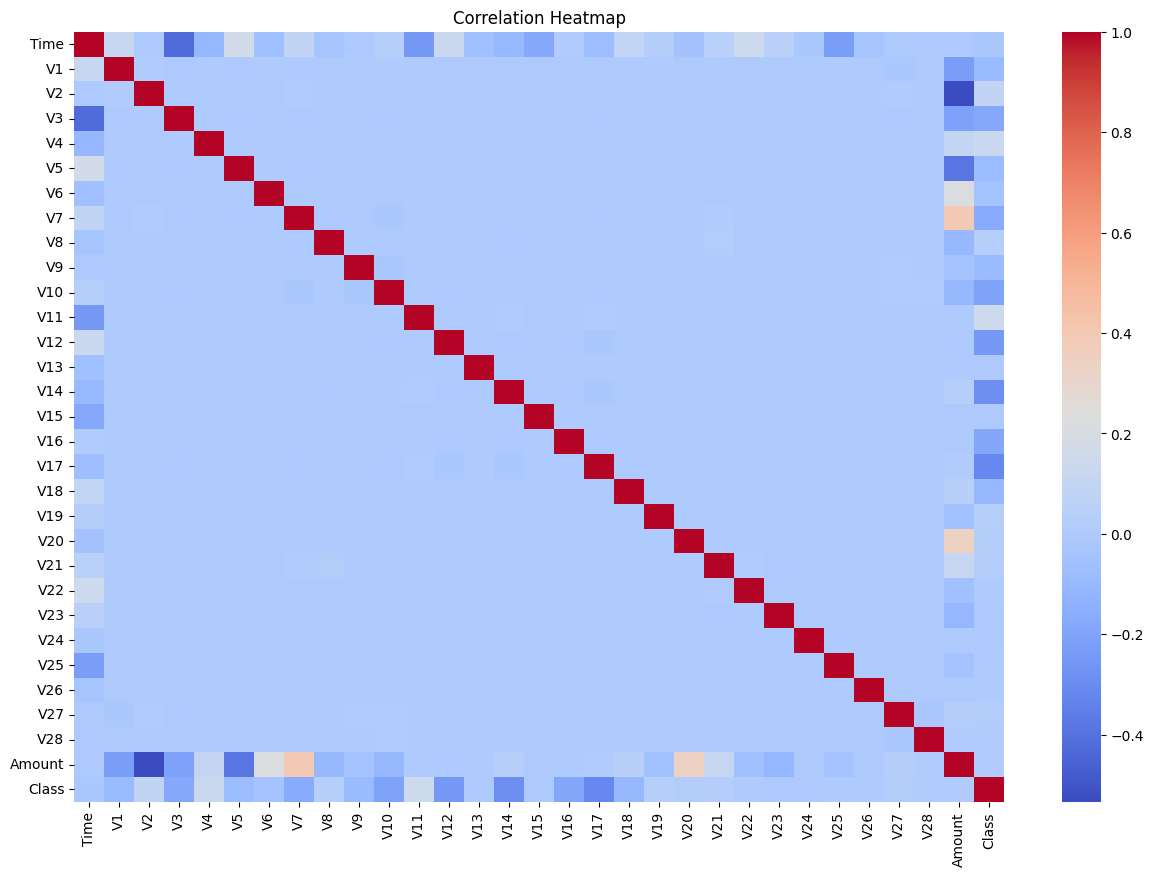

In [8]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


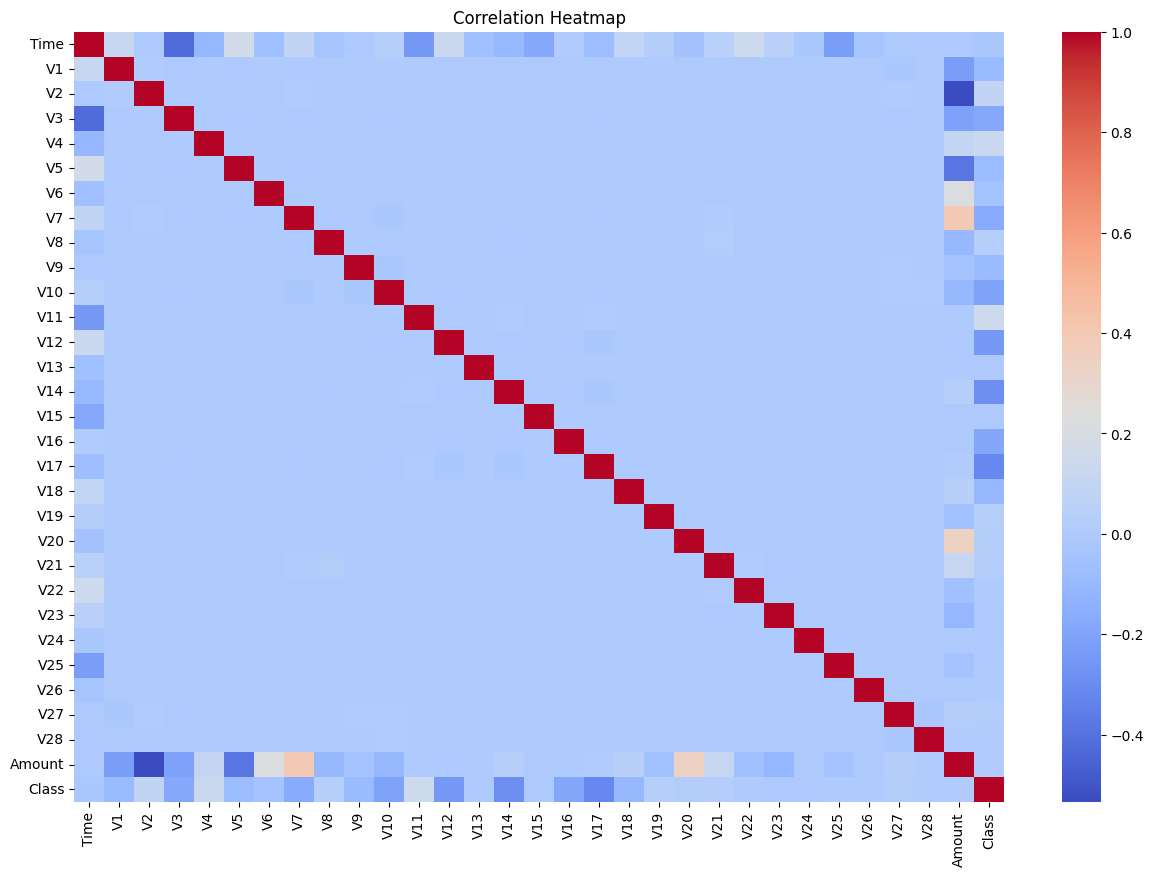

In [9]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Step 4: Feature Engineering
X = data.drop(['Class'], axis=1)
y = data['Class']

In [11]:

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Step 5: Modeling and Evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.62      0.73        95

    accuracy                           1.00     56746
   macro avg       0.94      0.81      0.86     56746
weighted avg       1.00      1.00      1.00     56746


Logistic Regression Confusion Matrix:



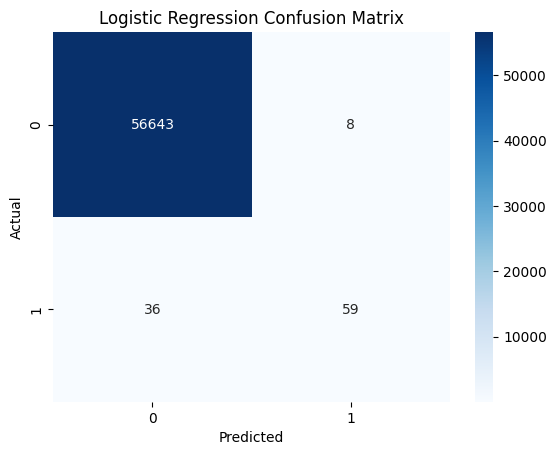

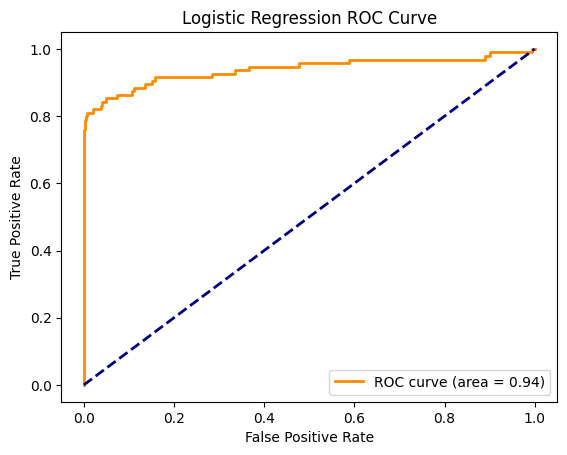


Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.71      0.71        95

    accuracy                           1.00     56746
   macro avg       0.86      0.85      0.86     56746
weighted avg       1.00      1.00      1.00     56746


Decision Tree Confusion Matrix:



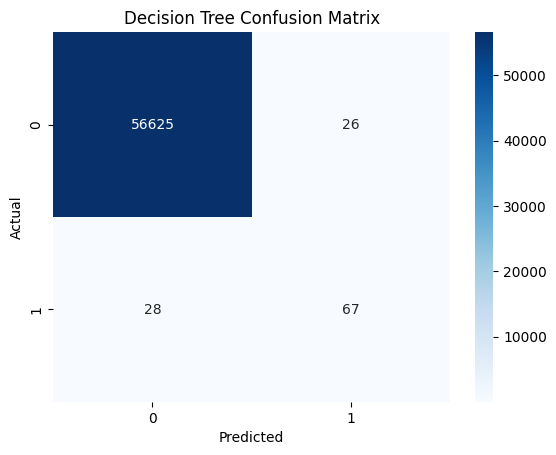

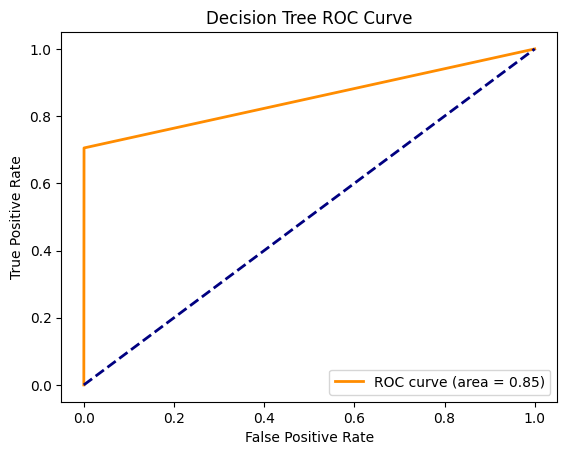


Training Neural Network...

Neural Network Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.60      0.45      0.51        95

    accuracy                           1.00     56746
   macro avg       0.80      0.73      0.76     56746
weighted avg       1.00      1.00      1.00     56746


Neural Network Confusion Matrix:



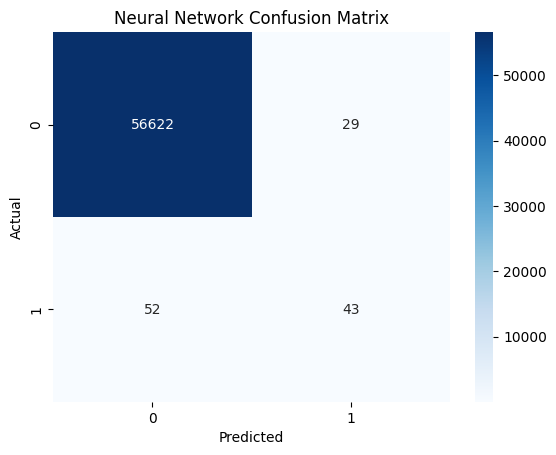

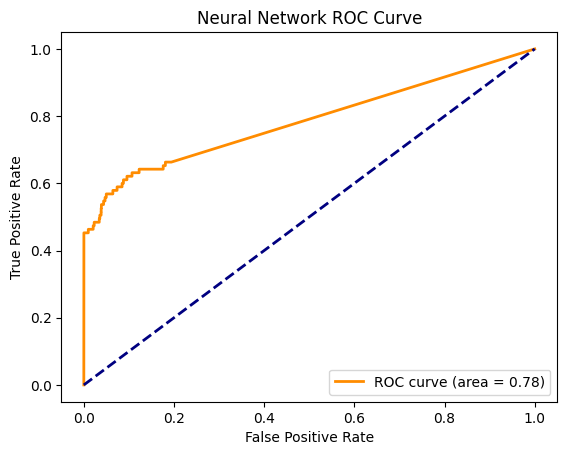

In [13]:

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"\n{model_name} Confusion Matrix:\n")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'{model_name} ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
